In [21]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score

In [22]:
def load_data(train_path, test_path):
    train_df = pd.read_csv(train_path)
    test_df = pd.read_csv(test_path)

    # Extract features and labels
    X_train = train_df['text'].astype(str)
    y_train = train_df['label']
    X_test = test_df['text'].astype(str)
    y_test = test_df['label']
    
    return X_train, y_train, X_test, y_test, train_df, test_df

In [23]:
def create_bow_features(X_train, X_test):
    
    vectorizer = CountVectorizer(min_df=2, max_df=0.85)
    X_train_bow = vectorizer.fit_transform(X_train)
    X_test_bow = vectorizer.transform(X_test)
    
    return X_train_bow, X_test_bow, vectorizer

In [24]:
def train_model(X_train_bow, y_train, X_test_bow, y_test):
    nb_model = MultinomialNB()
    cv_scores = cross_val_score(nb_model, X_train_bow, y_train, cv=5)
    print(f"Cross-validation scores: {cv_scores}")
    print(f"Mean CV score: {np.mean(cv_scores):.4f}")
    
    nb_model.fit(X_train_bow, y_train)
    
    y_pred = nb_model.predict(X_test_bow)
    
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Test Accuracy: {accuracy:.4f}")
    
    report = classification_report(y_test, y_pred, target_names=["not pl", "pl"], labels=[0, 1])
    print("Classification Report:")
    print(report)

    # ✅ Extract and print F1-score
    f1 = f1_score(y_test, y_pred)
    print(f"F1 Score: {f1:.4f}")
    
    # Create confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plot_confusion_matrix(cm, ["not pl", "pl"])
    
    return nb_model, y_pred, report

In [25]:
def plot_confusion_matrix(cm, class_names):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.show()

In [26]:
def analyze_errors(test_df, y_test, y_pred):
    test_df['predicted'] = y_pred
    misclassified = test_df[test_df['label'] != test_df['predicted']]
    
    print(f"Number of misclassified examples: {len(misclassified)}")
    
    if len(misclassified) > 0:
        print("Sample of misclassified texts:")
        samples = misclassified.sample(min(5, len(misclassified)))
        for i, row in samples.iterrows():
            print(f"Text: {row['text'][:100]}...")
            print(f"True label: {row['label']} (Predicted: {row['predicted']})")
            print("-" * 80)
    
    return misclassified

Training examples: 8375
Testing examples: 2094
Label distribution in training: {0: 7581, 1: 794}
Vocabulary size: 12939
Cross-validation scores: [0.88298507 0.89253731 0.89074627 0.89313433 0.88597015]
Mean CV score: 0.8891
Test Accuracy: 0.8945
Classification Report:
              precision    recall  f1-score   support

      not pl       0.92      0.97      0.94      1895
          pl       0.37      0.16      0.22       199

    accuracy                           0.89      2094
   macro avg       0.64      0.57      0.58      2094
weighted avg       0.87      0.89      0.88      2094

F1 Score: 0.2246


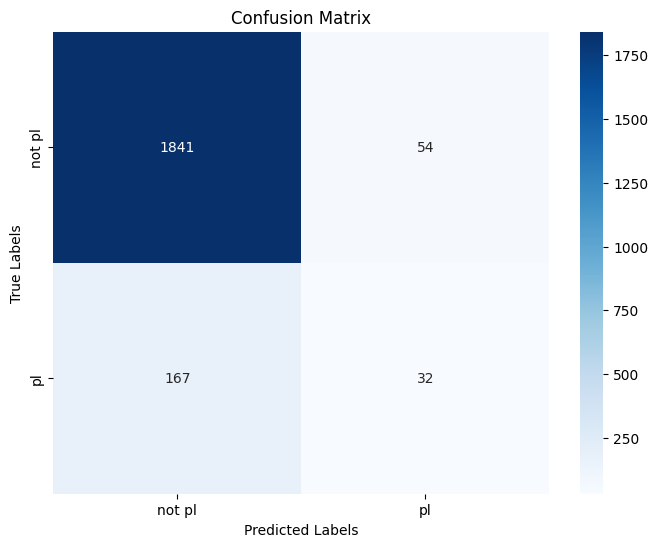

Number of misclassified examples: 221
Sample of misclassified texts:
Text: It is miserable being poor and homeless in an affluent nation where one 's worth is measured by what...
True label: 1 (Predicted: 0)
--------------------------------------------------------------------------------
Text: " We know Uber partners with an extensive network of drivers , and Plunket nurses support some of ou...
True label: 1 (Predicted: 0)
--------------------------------------------------------------------------------
Text: IdeaRaya spokesman Maryam Ramli Lee in an interview with Malay Mail Online , September 10 , 2015 . F...
True label: 1 (Predicted: 0)
--------------------------------------------------------------------------------
Text: " I expect more resources in the hands of people in need and the humanitarian workers on the frontli...
True label: 1 (Predicted: 0)
--------------------------------------------------------------------------------
Text: TurkIt 's heartening to see that measures are

In [27]:
train_path = 'Data/train.csv'  # Update with your actual file paths
test_path = 'Data/dev.csv'

# Load data
X_train, y_train, X_test, y_test, train_df, test_df = load_data(train_path, test_path)

# Print data statistics
print(f"Training examples: {len(X_train)}")
print(f"Testing examples: {len(X_test)}")
print(f"Label distribution in training: {pd.Series(y_train).value_counts().to_dict()}")

# Create BoW features
X_train_bow, X_test_bow, vectorizer = create_bow_features(X_train, X_test)
print(f"Vocabulary size: {len(vectorizer.get_feature_names_out())}")

# Train and evaluate model
nb_model, y_pred, report = train_model(X_train_bow, y_train, X_test_bow, y_test)

# Analyze important features
# analyze_important_features(vectorizer, nb_model, ["not pl", "pl"])

# Analyze errors
misclassified = analyze_errors(test_df, y_test, y_pred)

